In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [80]:
happiness = pd.read_csv("Happiness.csv")
gdp = pd.read_excel("GDP.xls")
edu = pd.read_excel("Education.xls")


In [81]:
# Rename columns and add year
happiness = happiness.rename(columns={"Score": "happiness_score", "Country or region": "country"})
happiness["year"] = 2019
happiness_renamed = happiness.copy()

In [82]:
print("Happiness columns:", happiness.columns)
print("GDP columns:", gdp.columns)
print("Education columns:", edu.columns)

Happiness columns: Index(['Overall rank', 'country', 'happiness_score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'year'],
      dtype='object')
GDP columns: Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024'],
      dtype='object')
Education columns: Index(['Country Name', 'Country 

In [83]:
gdp_year_cols = [col for col in gdp.columns if col.isdigit()]
edu_year_cols = [col for col in edu.columns if col.isdigit()]

In [84]:
gdp_long = gdp.melt(
    id_vars=["Country Name"],
    value_vars=gdp_year_cols,
    var_name="year",
    value_name="gdp_per_capita"
)
gdp_long = gdp_long.rename(columns={"Country Name": "country"})
gdp_long["year"] = gdp_long["year"].astype(int)

In [85]:
edu_long = edu.melt(
    id_vars=["Country Name"],
    value_vars=edu_year_cols,
    var_name="year",
    value_name="edu_expenditure"
)
edu_long = edu_long.rename(columns={"Country Name": "country"})
edu_long["year"] = edu_long["year"].astype(int)

In [86]:
gdp_2019 = gdp_long[gdp_long["year"] == 2019]
edu_2019 = edu_long[edu_long["year"] == 2019]

In [87]:
print("Happiness columns:", happiness.columns.tolist())
print("GDP columns:", gdp_2019.columns.tolist())
print("Education columns:", edu_2019.columns.tolist())

Happiness columns: ['Overall rank', 'country', 'happiness_score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'year']
GDP columns: ['country', 'year', 'gdp_per_capita']
Education columns: ['country', 'year', 'edu_expenditure']


In [88]:
merged1 = pd.merge(happiness_renamed, gdp_2019, on=["country", "year"], how="inner")
merged_all = pd.merge(merged1, edu_2019, on=["country", "year"], how="inner")
print("Merged shape:", merged_all.shape)
merged_all

Merged shape: (132, 12)


,Overall rank,country,happiness_score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year,gdp_per_capita,edu_expenditure
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019,48358.180777,6.453000
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019,59404.266325,7.275880
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019,76430.588947,7.864560
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019,68452.236223,7.601300
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019,53554.900749,5.055940
...,...,...,...,...,...,...,...,...,...,...,...,...
127,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019,810.051412,3.238212
128,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019,1063.322510,3.596836
129,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2019,496.602504,NaN
130,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2019,449.228468,1.767921


In [89]:
df = merged_all.copy()
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")
df = df.drop_duplicates()
df = df.dropna()
df["year"] = df["year"].astype(int)
df["happiness_score"] = df["happiness_score"].astype(float)
df["gdp_per_capita"] = df["gdp_per_capita"].astype(float)
df["edu_expenditure"] = df["edu_expenditure"].astype(float)
df = df.sort_values(by=["country", "year"]).reset_index(drop=True)
print("Final cleaned dataset shape:", df.shape)
df

Final cleaned dataset shape: (115, 12)


,overall_rank,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year,gdp_per_capita,edu_expenditure
0,107,Albania,4.719,0.947,0.848,0.874,0.383,0.178,0.027,2019,5460.430509,3.870190
1,88,Algeria,5.211,1.002,1.160,0.785,0.086,0.073,0.114,2019,4468.453419,5.575366
2,47,Argentina,6.086,1.092,1.432,0.881,0.471,0.066,0.050,2019,9955.974787,4.771650
3,116,Armenia,4.559,0.850,1.055,0.815,0.283,0.095,0.064,2019,4597.228874,2.159842
4,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,2019,49885.994736,5.236780
...,...,...,...,...,...,...,...,...,...,...,...,...
110,15,United Kingdom,7.054,1.333,1.538,0.996,0.450,0.348,0.278,2019,42794.002265,5.261160
111,19,United States,6.892,1.433,1.457,0.874,0.454,0.280,0.128,2019,65227.956591,4.957470
112,33,Uruguay,6.293,1.124,1.465,0.891,0.523,0.127,0.150,2019,18315.731698,4.628340
113,41,Uzbekistan,6.174,0.745,1.529,0.756,0.631,0.322,0.240,2019,2041.384807,6.295347


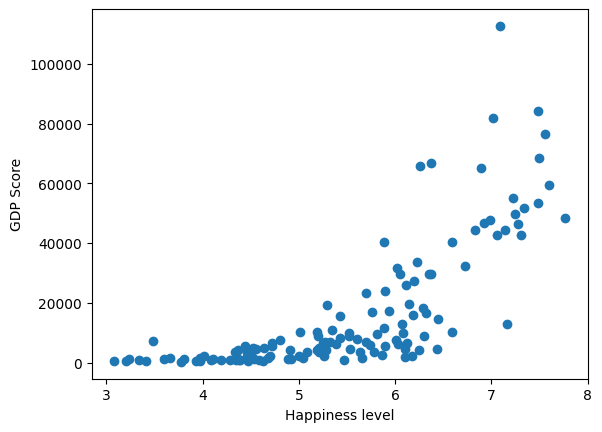

In [92]:
plt.scatter(merged_all["happiness_score"], merged_all['gdp_per_capita'])
plt.xlabel('Happiness level')
plt.ylabel("GDP Score")
plt.show()
